In [43]:
import requests
from lxml import etree
import pandas as pd
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

warnings.filterwarnings('ignore')

In [115]:
infos = []

In [126]:
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'cookie': 'lastCity=101210100; Hm_lvt_194df3105ad7148dcf2b98a91b5e727a=1612099294; __g=-; __fid=435d9f6aa4e779ffdd90b73213f2c44e; __l=l=%2Fwww.zhipin.com%2Fc101210100%2F%3Fquery%3D%25E5%25A4%25A7%25E6%2595%25B0%25E6%258D%25AE%26page%3D2&s=3&friend_source=0&s=3&friend_source=0; ___gtid=1634197223; __c=1612099295; __a=77387273.1599992479.1604801180.1612099295.258.6.52.258; __zp_stoken__=726dbC3MdS2JQPRkaY1peTHhsMAAufyYXUT1pBExKVTpmTBYYUVxaYlVNYzVVeDp%2BHlcSTEhXRBI1LUdCPXkjCwkFTiVkYRMPdz8uOgkBC1gqDnorAycxDngiFR9%2FCgA2GAYYdXV3NWw0VVEhJQ%3D%3D; Hm_lpvt_194df3105ad7148dcf2b98a91b5e727a=1612105083', 
    'referer': 'https://www.zhipin.com/job_detail/?query=%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%B8%88&city=101210100&industry=&position=',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
}
for i in range(9, 11):
    url = f"https://www.zhipin.com/c101210100/s_306-t_807/?query=%E5%A4%A7%E6%95%B0%E6%8D%AE&page={i}"
    html = requests.get(url, headers=headers).text
    jobs = etree.HTML(html).xpath('//div[@class="job-list"]//li')
    for job in jobs:
        try:
            name = job.xpath('.//span[@class="job-name"]//text()')[0]
            area = job.xpath('.//span[@class="job-area"]//text()')[0]
            salary = job.xpath('.//span[@class="red"]//text()')[0]
            edu_type = job.xpath('.//div[@class="job-limit clearfix"]/p/text()')[0]
            education = job.xpath('.//div[@class="job-limit clearfix"]/p/text()')[1]
            publis = job.xpath('.//div[@class="info-publis"]//text()')[1]
            publis_title = job.xpath('.//div[@class="info-publis"]//text()')[2]
            company = job.xpath('.//div[@class="company-text"]//text()')[1]
            com_type = job.xpath('.//div[@class="company-text"]/p//text()')[0]
            com_level = job.xpath('.//div[@class="company-text"]/p//text()')[1]
            com_scale = job.xpath('.//div[@class="company-text"]/p//text()')[2]
            tags = job.xpath('.//div[@class="tags"]/span/text()')
            desc = job.xpath('.//div[@class="info-desc"]//text()')
            infos.append([name, area, salary, edu_type, education, publis, publis_title, tags, desc, company, com_type, com_level, com_scale])
        except:
            pass
    print(i)    
    time.sleep(3)

9
10


In [127]:
len(infos)

285

In [128]:
df = pd.DataFrame(infos, columns=['name', 'area', 'salary', 'edu_type', 'education', 'publis', 'publis_title', 'tags', 'desc', 'company', 'com_type', 'com_level', 'com_scale'])

In [129]:
df.head()

,name,area,salary,edu_type,education,publis,publis_title,tags,desc,company,com_type,com_level,com_scale
0,大数据开发工程师,杭州·余杭区·未来科技城,15-30K·16薪,在校/应届,本科,朱先生,数据技术专家,"[SQL, Python, Java, 数据开发, 数据仓库]",[免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，节...,阿里巴巴集团,互联网,已上市,10000人以上
1,2021届大数据工程师（Java方向）,杭州·滨江区·浦沿,10-15K,在校/应届,本科,陈女士,HR,"[Shell, 分布式技术, 大数据, Hadoop]",[节日福利，定期体检，五险一金，加班补助，员工旅游，带薪年假，餐补，股票期权，免费班车，交通...,浙江大华,互联网,已上市,10000人以上
2,大数据平台开发工程师,杭州·滨江区·长河,22-35K,3-5年,本科,林女士,HRBP,"[数据仓库, 数据库开发, Hadoop, HBase, 云计算]",[员工旅游，年终奖，五险一金，交通补助，包吃，带薪年假，股票期权，定期体检，餐补，补充医疗保...,网易游戏,游戏,已上市,10000人以上
3,大数据开发,杭州·西湖区·黄龙,13-25K,经验不限,本科,邓女士,研发经理,"[数据挖掘, Hadoop, 分布式技术, Spark, 数据仓库]",[双休，空调、洗衣机，网络、热水器，包食宿，五险],百世集团,物流/仓储,已上市,10000人以上
4,大数据架构师,杭州·滨江区·长河,20-40K·16薪,5-10年,本科,曹先生,工程师,"[数据仓库, 大数据]",[住房补贴，补充医疗保险，加班补助，餐补，零食下午茶，年终奖，免费班车，带薪年假，定期体检，...,网易杭州,互联网,已上市,10000人以上


In [130]:
df.drop_duplicates(['name', 'area', 'company', 'salary', 'publis', 'education'])

,name,area,salary,edu_type,education,publis,publis_title,tags,desc,company,com_type,com_level,com_scale
0,大数据开发工程师,杭州·余杭区·未来科技城,15-30K·16薪,在校/应届,本科,朱先生,数据技术专家,"[SQL, Python, Java, 数据开发, 数据仓库]",[免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，节...,阿里巴巴集团,互联网,已上市,10000人以上
1,2021届大数据工程师（Java方向）,杭州·滨江区·浦沿,10-15K,在校/应届,本科,陈女士,HR,"[Shell, 分布式技术, 大数据, Hadoop]",[节日福利，定期体检，五险一金，加班补助，员工旅游，带薪年假，餐补，股票期权，免费班车，交通...,浙江大华,互联网,已上市,10000人以上
2,大数据平台开发工程师,杭州·滨江区·长河,22-35K,3-5年,本科,林女士,HRBP,"[数据仓库, 数据库开发, Hadoop, HBase, 云计算]",[员工旅游，年终奖，五险一金，交通补助，包吃，带薪年假，股票期权，定期体检，餐补，补充医疗保...,网易游戏,游戏,已上市,10000人以上
3,大数据开发,杭州·西湖区·黄龙,13-25K,经验不限,本科,邓女士,研发经理,"[数据挖掘, Hadoop, 分布式技术, Spark, 数据仓库]",[双休，空调、洗衣机，网络、热水器，包食宿，五险],百世集团,物流/仓储,已上市,10000人以上
4,大数据架构师,杭州·滨江区·长河,20-40K·16薪,5-10年,本科,曹先生,工程师,"[数据仓库, 大数据]",[住房补贴，补充医疗保险，加班补助，餐补，零食下午茶，年终奖，免费班车，带薪年假，定期体检，...,网易杭州,互联网,已上市,10000人以上
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,数据技术专家,杭州·余杭区·西溪,35-65K·16薪,5-10年,本科,黄先生,高级数据技术专家,"[数据仓库, 大数据, ETL, 数据架构师, SQL]",[定期体检，股票期权，交通补助，加班补助，年终奖，餐补，五险一金，节日福利，员工旅游，补充医...,阿里巴巴集团,互联网,已上市,10000人以上
281,数据开发专家,杭州·余杭区·西溪,25-40K,5-10年,本科,马先生,数据开发,"[数据仓库, 大数据, ETL]",[加班补助，五险一金，股票期权，定期体检，年终奖，补充医疗保险，带薪年假，员工旅游，节日福利...,阿里巴巴集团,互联网,已上市,10000人以上
282,算法模型,杭州·滨江区·长河,18-35K·13薪,5-10年,本科,安女士,安全运营,"[数据仓库, 数据挖掘, 大数据, 数据库开发, DBA]",[定期体检，免费班车，年终奖，带薪年假，加班补助，补充医疗保险，股票期权，节日福利，员工旅游...,阿里巴巴集团,互联网,已上市,10000人以上
283,数据研发专家,杭州·余杭区·五常,20-40K·13薪,5-10年,本科,邓女士,数据研发工程师,"[数据仓库, 数据分析, 大数据, 云计算, ETL]",[带薪年假，餐补，五险一金，定期体检，年终奖，免费班车，股票期权，节日福利，员工旅游，交通补...,阿里巴巴集团,互联网,已上市,10000人以上


In [131]:
df.drop_duplicates(['name', 'area', 'company', 'salary', 'publis', 'education']).reset_index(drop=True).to_csv('BigDataJobInfos.csv', index=False)

- 数据分析

In [2]:
df = pd.read_csv('BigDataJobInfos.csv')

In [53]:
df = df[~df['education'].str.contains('月')]

In [8]:
df['tags'] = df['tags'].str.replace("[\[\] \'\']", '')

In [4]:
tags = ','.join(df['tags'].tolist())

In [5]:
from collections import Counter
counter = Counter(tags.split(','))

In [6]:
counter.most_common(15)

[('数据仓库', 143),
 ('Java', 84),
 ('大数据', 73),
 ('ETL', 72),
 ('数据挖掘', 63),
 ('数据分析', 63),
 ('Hadoop', 62),
 ('分布式技术', 46),
 ('数据开发', 43),
 ('Spark', 39),
 ('Python', 34),
 ('SQL', 33),
 ('Hive', 20),
 ('数据架构', 16),
 ('架构师', 15)]

In [9]:
df.head()

,name,area,salary,edu_type,education,publis,publis_title,tags,desc,company,com_type,com_level,com_scale
0,大数据开发工程师,杭州·余杭区·未来科技城,15-30K·16薪,在校/应届,本科,朱先生,数据技术专家,"SQL,Python,Java,数据开发,数据仓库",['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴集团,互联网,已上市,10000人以上
1,2021届大数据工程师（Java方向）,杭州·滨江区·浦沿,10-15K,在校/应届,本科,陈女士,HR,"Shell,分布式技术,大数据,Hadoop",['节日福利，定期体检，五险一金，加班补助，员工旅游，带薪年假，餐补，股票期权，免费班车，交...,浙江大华,互联网,已上市,10000人以上
2,大数据平台开发工程师,杭州·滨江区·长河,22-35K,3-5年,本科,林女士,HRBP,"数据仓库,数据库开发,Hadoop,HBase,云计算",['员工旅游，年终奖，五险一金，交通补助，包吃，带薪年假，股票期权，定期体检，餐补，补充医疗...,网易游戏,游戏,已上市,10000人以上
3,大数据开发,杭州·西湖区·黄龙,13-25K,经验不限,本科,邓女士,研发经理,"数据挖掘,Hadoop,分布式技术,Spark,数据仓库",['双休，空调、洗衣机，网络、热水器，包食宿，五险'],百世集团,物流/仓储,已上市,10000人以上
4,大数据架构师,杭州·滨江区·长河,20-40K·16薪,5-10年,本科,曹先生,工程师,"数据仓库,大数据",['住房补贴，补充医疗保险，加班补助，餐补，零食下午茶，年终奖，免费班车，带薪年假，定期体检...,网易杭州,互联网,已上市,10000人以上


In [11]:
df['publis_title'].str.contains('HR').mean()

0.12280701754385964

In [47]:
df['region'] = df['area'].str.split('·').str[1]

In [54]:
df['edu_type'].value_counts()

3-5年     129
5-10年     84
经验不限      29
1-3年      28
在校/应届      8
10年以上      3
1年以内       2
Name: edu_type, dtype: int64

In [55]:
df['company'].value_counts()

阿里巴巴集团        113
浙江大华           50
网易             43
阿里云            26
海康威视           11
网易杭州           10
杭州海康威视          7
海康威视武汉研发中心      6
吉利集团            4
阿里健康科技          3
百世集团            2
中软国际            2
亚信科技            2
网易游戏            1
阿里巴巴            1
腾讯              1
埃森哲企云           1
Name: company, dtype: int64

In [31]:
df['sala'] = df['salary'].str.findall("(\d+)").str[:2].map(lambda x:(int(x[1])-int(x[0]))/3+int(x[0])).round(0).astype(int)

In [20]:
df['com'] = df.company.replace("阿里巴巴集团", "阿里巴巴").replace("阿里云", "阿里巴巴").replace("阿里健康科技", "阿里巴巴") \
                      .replace("网易杭州", "网易").replace("网易游戏", "网易").replace("海康威视武汉研发中心", "海康威视").replace("杭州海康威视", "海康威视")


In [21]:
df['com'].value_counts()

阿里巴巴     145
网易        54
浙江大华      50
海康威视      24
吉利集团       4
百世集团       2
亚信科技       2
中软国际       2
埃森哲企云      1
腾讯         1
Name: com, dtype: int64

In [68]:
jobs = df[['name', 'region', 'sala', 'education', 'edu_type', 'tags', 'desc', 'com']].rename(columns={
    'name':'title', 'sala':'salary', 'edu_type':'experience', 'com':'company'
})

In [69]:
jobs.head()

,title,region,salary,education,experience,tags,desc,company
0,大数据开发工程师,余杭区,20,本科,在校/应届,"SQL,Python,Java,数据开发,数据仓库",['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴
1,2021届大数据工程师（Java方向）,滨江区,12,本科,在校/应届,"Shell,分布式技术,大数据,Hadoop",['节日福利，定期体检，五险一金，加班补助，员工旅游，带薪年假，餐补，股票期权，免费班车，交...,浙江大华
2,大数据平台开发工程师,滨江区,26,本科,3-5年,"数据仓库,数据库开发,Hadoop,HBase,云计算",['员工旅游，年终奖，五险一金，交通补助，包吃，带薪年假，股票期权，定期体检，餐补，补充医疗...,网易
3,大数据开发,西湖区,17,本科,经验不限,"数据挖掘,Hadoop,分布式技术,Spark,数据仓库",['双休，空调、洗衣机，网络、热水器，包食宿，五险'],百世集团
4,大数据架构师,滨江区,27,本科,5-10年,"数据仓库,大数据",['住房补贴，补充医疗保险，加班补助，餐补，零食下午茶，年终奖，免费班车，带薪年假，定期体检...,网易


In [70]:
jobs['title'].unique()

array(['大数据开发工程师', '2021届大数据工程师（Java方向）', '大数据平台开发工程师', '大数据开发', '大数据架构师',
       '资深大数据开发/专家-网易严选', '大数据技术专家', '大数据分析师', '高级大数据实施开发工程师',
       '大数据开发工程师（实习生）', '数据开发工程师', '数据库高级工程师（杭州）', '数据研发技术专家', '数据开发',
       '大数据平台开发工程师-伏羲实验室003', '大数据系统工程师', '大数据运维工程师', '大数据运维工程师（实习生）',
       '大数据产品经理', '大数据解决方案工程师', '测试：大数据测试、自动化测试、测试开发', '数据开发专家',
       '大数据研发专家', '交通大数据算法高级工程师', '大数据技术支持（有数）', '高级大数据开发工程师',
       '资深大数据开发工程师', '大数据平台技术专家', '研究院-大数据算法工程师', '大数据平台架构师', '大数据软件开发',
       '资深大数据技术支持', '大数据研发工程师/专家', '高级/资深大数据开发工程师', '高级大数据挖掘工程师',
       '大数据挖掘工程师', '大数据平台运维架构师', '大数据技术支持', '大数据测试', '研究院—大数据开发工程师',
       '大数据平台架构师-GTS', '测试工程师(大数据)', '大数据专家', '大数据运维经理', '大数据平台Java开发工程师',
       '大数据开发工程师-专家岗', '大数据平台Java开发', '大数据产品架构师', '大数据开发专家', '大数据支持专家',
       '大数据算法专家', '高级/资深数据开发工程师', '大数据应用开发工程师', '高级/资深大数据解决方案架构师-杭州',
       '金融大数据架构师', '大数据算法工程师（数据挖掘)', '高级Java开发（大数据）', '资深大数据平台java开发工程师',
       '大数据架构师(杭州)', '大数据技术支持（猛犸）', '数据湖开发', '大数据平台开发专家',
       'Web前端工程师（大数据研究院）', '中台架构师 （

In [74]:
def get_job_type(title):
    if "开发" in title or "研发" in title:
        return "开发"
    if "算法" in title or "挖掘" in title or "分析" in title:
        return "挖掘"
    if "产品" in title:
        return "产品"
    if "架构" in title:
        return "架构师"
    else:
        return "其他"

In [76]:
jobs['title_type'] = jobs['title'].apply(get_job_type)

In [78]:
jobs.head()

,title,region,salary,education,experience,tags,desc,company,title_type
0,大数据开发工程师,余杭区,20,本科,在校/应届,"SQL,Python,Java,数据开发,数据仓库",['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴,开发
1,2021届大数据工程师（Java方向）,滨江区,12,本科,在校/应届,"Shell,分布式技术,大数据,Hadoop",['节日福利，定期体检，五险一金，加班补助，员工旅游，带薪年假，餐补，股票期权，免费班车，交...,浙江大华,其他
2,大数据平台开发工程师,滨江区,26,本科,3-5年,"数据仓库,数据库开发,Hadoop,HBase,云计算",['员工旅游，年终奖，五险一金，交通补助，包吃，带薪年假，股票期权，定期体检，餐补，补充医疗...,网易,开发
3,大数据开发,西湖区,17,本科,经验不限,"数据挖掘,Hadoop,分布式技术,Spark,数据仓库",['双休，空调、洗衣机，网络、热水器，包食宿，五险'],百世集团,开发
4,大数据架构师,滨江区,27,本科,5-10年,"数据仓库,大数据",['住房补贴，补充医疗保险，加班补助，餐补，零食下午茶，年终奖，免费班车，带薪年假，定期体检...,网易,架构师


<AxesSubplot:>

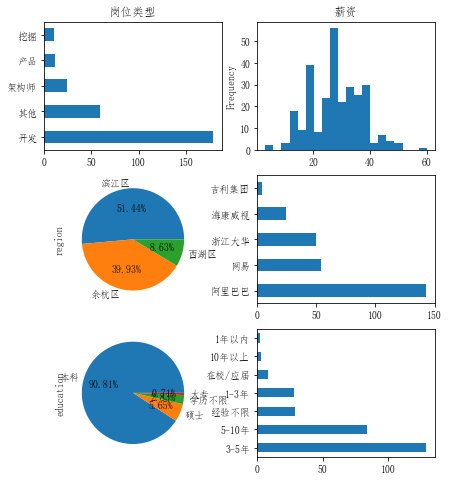

In [164]:
fig, axes = plt.subplots(3, 2, figsize=(7, 8))
jobs['title_type'].value_counts().plot(kind='barh', ax=axes[0][0], title='岗位类型')
jobs['salary'].plot(kind='hist', bins=20, ax=axes[0][1], title='薪资')
jobs['region'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1][0])
jobs['company'].value_counts().head().plot(kind='barh', ax=axes[1][1])
jobs['education'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[2][0])
jobs['experience'].value_counts().plot(kind='barh', ax=axes[2][1])

<AxesSubplot:title={'center':'大数据岗位标签TOP10'}>

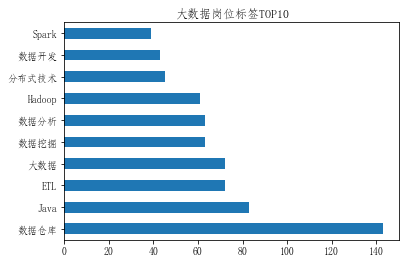

In [136]:
jobs['tags'].str.split(',').explode().value_counts().head(10).plot(kind='barh', title='大数据岗位标签TOP10')

In [173]:
jobs.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 284
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       283 non-null    object
 1   region      278 non-null    object
 2   salary      283 non-null    int32 
 3   education   283 non-null    object
 4   experience  283 non-null    object
 5   tags        283 non-null    object
 6   desc        283 non-null    object
 7   company     283 non-null    object
 8   title_type  283 non-null    object
dtypes: int32(1), object(8)
memory usage: 29.1+ KB


<AxesSubplot:title={'center':'海康威视'}, ylabel='title,region,salary,education,experience,tags,desc,company,title_type'>

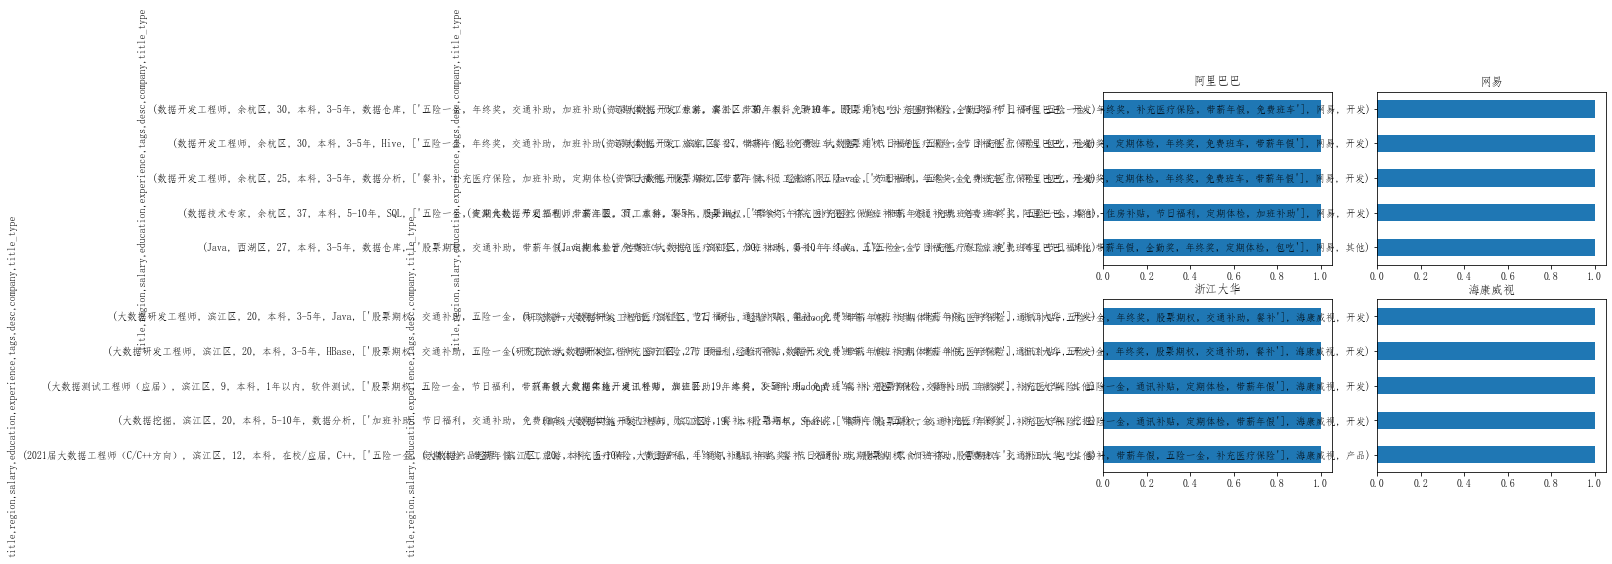

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
jobs.query('company=="阿里巴巴"').explode('tags').value_counts().head(5).plot(kind='barh', ax=axes[0][0], title='阿里巴巴')
jobs.query('company=="网易"').explode('tags').value_counts().head(5).plot(kind='barh', ax=axes[0][1], title='网易')
jobs.query('company=="浙江大华"').explode('tags').value_counts().head(5).plot(kind='barh', ax=axes[1][0], title='浙江大华')
jobs.query('company=="海康威视"').explode('tags').value_counts().head(5).plot(kind='barh', ax=axes[1][1], title='海康威视')

In [143]:
jobs['tags'] = jobs['tags'].str.split(',')
tags = jobs.explode('tags')

In [145]:
tags[tags['tags'].isin(['数据仓库', 'Java', 'ETL', '数据挖掘', '数据分析', 'Hadoop', 'Spark', 'Python', 'SQL', '数据架构', '数据处理'])]

,title,region,salary,education,experience,tags,desc,company,title_type
0,大数据开发工程师,余杭区,20,本科,在校/应届,SQL,['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴,开发
0,大数据开发工程师,余杭区,20,本科,在校/应届,Python,['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴,开发
0,大数据开发工程师,余杭区,20,本科,在校/应届,Java,['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴,开发
0,大数据开发工程师,余杭区,20,本科,在校/应届,数据仓库,['免费班车，五险一金，补充医疗保险，年终奖，股票期权，定期体检，交通补助，加班补助，餐补，...,阿里巴巴,开发
1,2021届大数据工程师（Java方向）,滨江区,12,本科,在校/应届,Hadoop,['节日福利，定期体检，五险一金，加班补助，员工旅游，带薪年假，餐补，股票期权，免费班车，交...,浙江大华,其他
...,...,...,...,...,...,...,...,...,...
283,数据研发专家,余杭区,27,本科,5-10年,数据分析,['带薪年假，餐补，五险一金，定期体检，年终奖，免费班车，股票期权，节日福利，员工旅游，交通...,阿里巴巴,开发
283,数据研发专家,余杭区,27,本科,5-10年,ETL,['带薪年假，餐补，五险一金，定期体检，年终奖，免费班车，股票期权，节日福利，员工旅游，交通...,阿里巴巴,开发
284,数据开发,余杭区,27,本科,5-10年,数据处理,['免费班车，五险一金，交通补助，带薪年假，加班补助，定期体检，员工旅游，餐补，节日福利，年...,阿里巴巴,开发
284,数据开发,余杭区,27,本科,5-10年,数据仓库,['免费班车，五险一金，交通补助，带薪年假，加班补助，定期体检，员工旅游，餐补，节日福利，年...,阿里巴巴,开发


<AxesSubplot:xlabel='tags', ylabel='salary'>

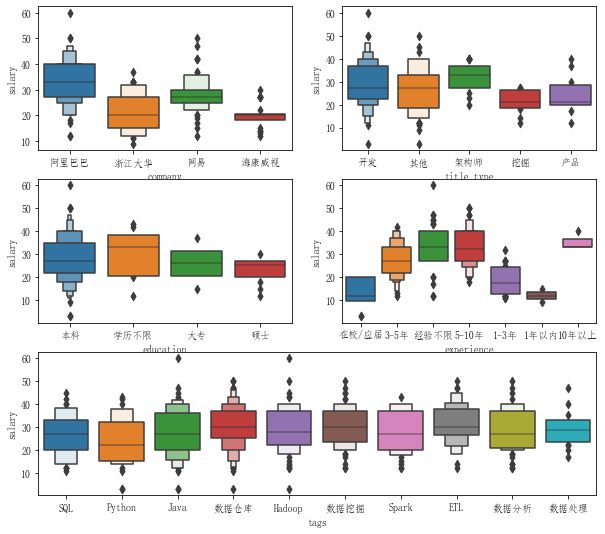

In [158]:
plt.figure(figsize=(10, 9))
ax1 = plt.subplot2grid((3,2), (0,0), colspan = 1, rowspan = 1)
ax2 = plt.subplot2grid((3,2), (0,1), colspan = 1, rowspan = 1)
ax3 = plt.subplot2grid((3,2), (1,0), colspan = 1, rowspan = 1)
ax4 = plt.subplot2grid((3,2), (1,1), colspan = 1, rowspan = 1)
ax5 = plt.subplot2grid((3,2), (2,0), colspan = 2, rowspan = 1)
sns.boxenplot(data=jobs[jobs['company'].isin(['海康威视', '阿里巴巴', '网易', '浙江大华'])], x='company', y='salary', ax=ax1)
sns.boxenplot(data=jobs, x='title_type', y='salary', ax=ax2)
sns.boxenplot(data=jobs, x='education', y='salary', ax=ax3)
sns.boxenplot(data=jobs, x='experience', y='salary', ax=ax4)
sns.boxenplot(data=tags[tags['tags'].isin(['数据仓库', 'ETL', '数据挖掘', '数据分析', '数据处理', 'Hadoop', 'Spark', 'Java', 'Python', 'SQL'])], x='tags', y='salary', ax=ax5)

<AxesSubplot:xlabel='edu_type', ylabel='sala'>

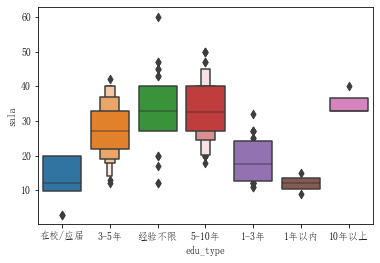

In [61]:
sns.boxenplot(data=df, x='edu_type', y='sala')

In [175]:
jobs.columns

Index(['title', 'region', 'salary', 'education', 'experience', 'tags', 'desc',
       'company', 'title_type'],
      dtype='object')

In [178]:
words = jobs['desc'].sum()

In [181]:
import jieba
from wordcloud import WordCloud

In [213]:
words_ = filter(lambda x:x not in "['，']", jieba.cut(words))
WordCloud(font_path="‪C:\Windows\Fonts\simkai.ttf", background_color="white")\
        .generate(','.join(words_)).to_file('a.png')